<a href="https://colab.research.google.com/github/Shisiajoy/MACHINE-LEARNING/blob/main/breastcancerCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LIBRARY IMPORTS

In [1]:
import os
import zipfile
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy as sp

from scipy import ndimage
from shutil import copyfile
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input , Flatten
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install kaggle


In [8]:
# Set up Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'shisiajoy'
os.environ['KAGGLE_KEY'] = '1dd180f469c6368d77b117006c289cd1'




In [15]:
#!kaggle competitions download -c rsna-screening-mammography-breast-cancer-detection


403 - Forbidden - Permission 'competitions.participate' was denied


## CBIS-DDSM: Breast Cancer Image Dataset

- This dataset contains mammogram images along with metadata that includes details about the findings (e.g., calcifications, masses) and patient information.

-MIAS Mammography dataset

In [17]:
# Download dataset using Kaggle CLI
!kaggle datasets download -d kmader/mias-mammography

# Unzip the downloaded file
!unzip mias-mammography.zip -d cbis_ddsm_data


Dataset URL: https://www.kaggle.com/datasets/kmader/mias-mammography
License(s): other
 98% 305M/312M [00:07<00:00, 32.4MB/s]
100% 312M/312M [00:07<00:00, 45.2MB/s]
Archive:  mias-mammography.zip
  inflating: cbis_ddsm_data/Info.txt  
  inflating: cbis_ddsm_data/all-mias.tar.gz  
  inflating: cbis_ddsm_data/all-mias/Info.txt  
  inflating: cbis_ddsm_data/all-mias/Licence.txt  
  inflating: cbis_ddsm_data/all-mias/README  
  inflating: cbis_ddsm_data/all-mias/mdb001.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb002.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb003.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb004.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb005.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb006.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb007.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb008.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb009.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb010.pgm  
  inflating: cbis_ddsm_data/all-mias/mdb011.pgm  
  inflating: cbis_ddsm_d

In [19]:
import os

# List files in the directory
for root, dirs, files in os.walk('cbis_ddsm_data'):
    for file in files:
        print(os.path.join(root, file))


cbis_ddsm_data/all-mias.tar.gz
cbis_ddsm_data/all_mias_scans.h5
cbis_ddsm_data/Info.txt
cbis_ddsm_data/all-mias/mdb043.pgm
cbis_ddsm_data/all-mias/mdb289.pgm
cbis_ddsm_data/all-mias/mdb276.pgm
cbis_ddsm_data/all-mias/mdb110.pgm
cbis_ddsm_data/all-mias/mdb223.pgm
cbis_ddsm_data/all-mias/mdb282.pgm
cbis_ddsm_data/all-mias/mdb052.pgm
cbis_ddsm_data/all-mias/mdb157.pgm
cbis_ddsm_data/all-mias/mdb063.pgm
cbis_ddsm_data/all-mias/mdb291.pgm
cbis_ddsm_data/all-mias/mdb314.pgm
cbis_ddsm_data/all-mias/mdb288.pgm
cbis_ddsm_data/all-mias/mdb242.pgm
cbis_ddsm_data/all-mias/mdb153.pgm
cbis_ddsm_data/all-mias/mdb321.pgm
cbis_ddsm_data/all-mias/mdb271.pgm
cbis_ddsm_data/all-mias/mdb084.pgm
cbis_ddsm_data/all-mias/mdb199.pgm
cbis_ddsm_data/all-mias/mdb192.pgm
cbis_ddsm_data/all-mias/mdb210.pgm
cbis_ddsm_data/all-mias/mdb172.pgm
cbis_ddsm_data/all-mias/mdb198.pgm
cbis_ddsm_data/all-mias/mdb261.pgm
cbis_ddsm_data/all-mias/mdb316.pgm
cbis_ddsm_data/all-mias/mdb244.pgm
cbis_ddsm_data/all-mias/mdb189.pgm
cb

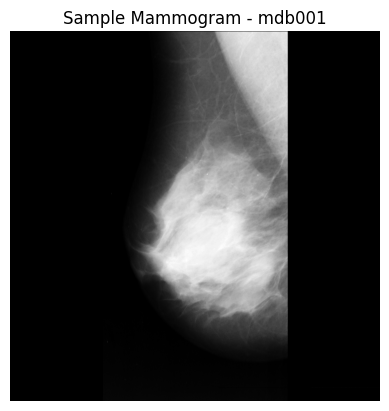

In [25]:
import cv2
import matplotlib.pyplot as plt

# Load a sample image
image_path = 'cbis_ddsm_data/all-mias/mdb001.pgm'

# Read the image using OpenCV
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image using Matplotlib
plt.imshow(image, cmap='gray')
plt.title('Sample Mammogram - mdb001')
plt.axis('off')
plt.show()


In [26]:
# Convert the PGM image to PNG format
output_path = 'cbis_ddsm_data/all-mias/mdb001.png'
cv2.imwrite(output_path, image)
print(f"Image saved to {output_path}")


Image saved to cbis_ddsm_data/all-mias/mdb001.png


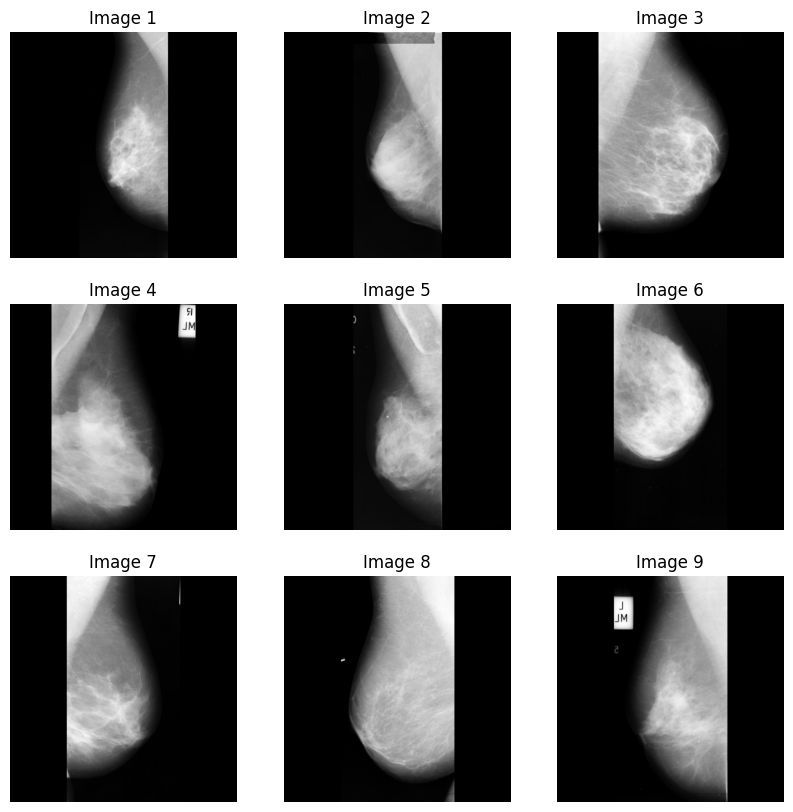

In [20]:
import cv2
import matplotlib.pyplot as plt

# Function to display multiple images
def display_images(image_paths):
    plt.figure(figsize=(10, 10))
    for i, path in enumerate(image_paths[:9], 1):  # Displaying first 9 images
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(3, 3, i)
        plt.imshow(image, cmap='gray')
        plt.title(f'Image {i}')
        plt.axis('off')
    plt.show()

# Example: Display a few images from the dataset
image_files = [f'cbis_ddsm_data/all-mias/{file}' for file in os.listdir('cbis_ddsm_data/all-mias') if file.endswith('.pgm')]
display_images(image_files)


-Meta Data

In [28]:
# Reading the Info.txt file to understand its contents
with open('cbis_ddsm_data/Info.txt', 'r') as file:
    info_content = file.read()
    print(info_content)  # Display the first 1000 characters to get a sense of the data


REFNUM BG CLASS SEVERITY X Y RADIUS 
mdb001 G CIRC B 535 425 197
mdb002 G CIRC B 522 280 69
mdb003 D NORM 
mdb004 D NORM 
mdb005 F CIRC B 477 133 30
mdb005 F CIRC B 500 168 26
mdb006 F NORM 
mdb007 G NORM 
mdb008 G NORM 
mdb009 F NORM 
mdb010 F CIRC B 525 425 33
mdb011 F NORM 
mdb012 F CIRC B 471 458 40
mdb013 G MISC B 667 365 31
mdb014 G NORM 
mdb015 G CIRC B 595 864 68
mdb016 G NORM 
mdb017 G CIRC B 547 573 48
mdb018 G NORM 
mdb019 G CIRC B 653 477 49
mdb020 G NORM 
mdb021 G CIRC B 493 125 49
mdb022 G NORM 
mdb023 G CIRC M 538 681 29
mdb024 G NORM 
mdb025 F CIRC B 674 443 79
mdb026 F NORM 
mdb027 F NORM 
mdb028 F CIRC M 338 314 56
mdb029 G NORM 
mdb030 G MISC B 322 676 43
mdb031 G NORM 
mdb032 G MISC B 388 742 66
mdb033 D NORM 
mdb034 D NORM 
mdb035 D NORM 
mdb036 D NORM 
mdb037 D NORM 
mdb038 D NORM 
mdb039 D NORM 
mdb040 D NORM 
mdb041 G NORM 
mdb042 G NORM 
mdb043 G NORM 
mdb044 G NORM 
mdb045 G NORM 
mdb046 G NORM 
mdb047 G NORM 
mdb048 G NORM 
mdb049 G NORM 
mdb050 G NORM 
mdb05

In [32]:
file_path = 'cbis_ddsm_data/Info.txt'

# Read the file into a DataFrame
df = pd.read_csv(file_path, delim_whitespace=True)

# Display the first few rows of the DataFrame
print(df.head())


   REFNUM BG CLASS SEVERITY      X      Y  RADIUS
0  mdb001  G  CIRC        B  535.0  425.0   197.0
1  mdb002  G  CIRC        B  522.0  280.0    69.0
2  mdb003  D  NORM      NaN    NaN    NaN     NaN
3  mdb004  D  NORM      NaN    NaN    NaN     NaN
4  mdb005  F  CIRC        B  477.0  133.0    30.0


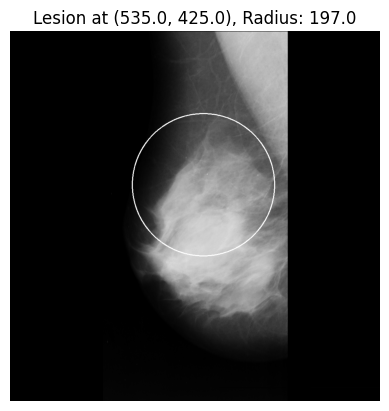

In [33]:
import cv2
import matplotlib.pyplot as plt

def visualize_lesion(image_path, x, y, radius):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if x and y and radius:
        # Draw a circle around the lesion
        cv2.circle(image, (int(x), int(y)), int(radius), (255, 0, 0), 2)
    plt.imshow(image, cmap='gray')
    plt.title(f'Lesion at ({x}, {y}), Radius: {radius}')
    plt.axis('off')
    plt.show()

# Example of visualizing an image with lesion annotation
sample_row = df[df['REFNUM'] == 'mdb001'].iloc[0]
image_path = 'cbis_ddsm_data/all-mias/mdb001.pgm'
visualize_lesion(image_path, sample_row['X'], sample_row['Y'], sample_row['RADIUS'])


In [13]:
# Test if Kaggle API is working correctly by listing datasets
!kaggle datasets list


ref                                                                  title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
berkayalan/paris-2024-olympics-medals                                Paris 2024 Olympics Medals                       1KB  2024-08-14 11:02:45           3859         69  1.0              
balajivaraprasad/crimes-against-women-in-india-2001-2021             Crimes Against Women in India (2001-2021)       13KB  2024-08-15 16:47:18           2028         47  1.0              
emreksz/data-science-and-analytics-internships-and-salaries          Data Related Internships and Salaries 2024      20KB  2024-08-11 17:48:31            600         22  1.0              
myrios/cost-of-living-index-by-country-by-number-2024       

In [14]:
# Check your current competitions and their access
!kaggle competitions list


ref                                                                                     deadline             category                reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2024                                      2024-11-10 23:59:00  Featured         1,100,000 Usd        820           False  
https://www.kaggle.com/competitions/isic-2024-challenge                                 2024-09-06 23:59:00  Research            80,000 Usd       2542           False  
https://www.kaggle.com/competitions/rsna-2024-lumbar-spine-degenerative-classification  2024-10-08 23:59:00  Featured            50,000 Usd       1155           False  
https://www.kaggle.com/competitions/ariel-data-challenge-2024                           2024-10-31 23:59:00  Featured            50,000 Usd        395     